# DAML 03 - Pandas Exercises



We will use the titanic data for this set of exercises, it gives the account of the survivors
from that tragic voyage.  Since the accounts are often incomplete, or the accounts for many could
not even be found, there is a very good deal of missing data, you will need to be careful with that.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
mpl.rcParams['figure.figsize'] = (12.5, 6.0)
import pandas as pd
pd.options.display.max_rows = 12
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


### 1. Describe general statistics and memory/values for the data frame, what can you evaluate from it (★☆☆)?

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [ ]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Evaluation:

### 2. How many and what were the towns where people embarked on the Titanic (★☆☆)?

In [ ]:
titanic['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [ ]:
len(titanic['embark_town'].unique())

4

### 3. What is the overall survival rate of the people that were on board (★☆☆)?

In [ ]:
titanic['survived'].sum()/len(titanic['survived'])

0.3838383838383838

### 4. What is the survival rate depending on the gender?  Use a bar plot to show the difference. (★★☆)

0.7420382165605095 0.18890814558058924


<BarContainer object of 2 artists>

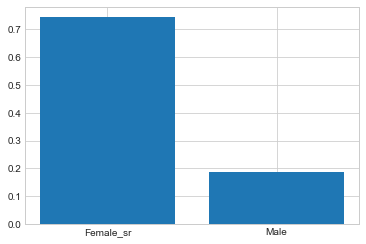

In [ ]:
female_sr=titanic[titanic['sex']=='female'].survived.mean()
male_sr=titanic[titanic['sex']=='male'].survived.mean()
print(female_sr,male_sr)
plt.bar(["Female_sr","Male"],[female_sr,male_sr])

### 5. Is the survival rate different depending on the class in which the person traveled? Use a plot. (★★☆)

In [ ]:
titanic['class'].unique()

[Third, First, Second]
Categories (3, object): [Third, First, Second]

In [ ]:
third=titanic[titanic['class']=='Third']
first=titanic[titanic['class']=='First']
second=titanic[titanic['class']=='Second']

In [ ]:
third.survived.mean()

0.24236252545824846

In [ ]:
thirdsurvival=third.survived.mean()
secondsurvival=second.survived.mean()
firstsurvival=first.survived.mean()
print(thirdsurvival,secondsurvival,firstsurvival)

0.24236252545824846 0.47282608695652173 0.6296296296296297


<BarContainer object of 3 artists>

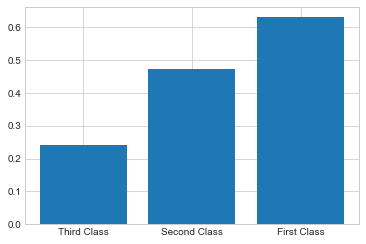

In [ ]:
plt.bar(["Third Class","Second Class","First Class"],[thirdsurvival,secondsurvival,firstsurvival])

### 6. Compare, with a plot, the survival rate according to both: gender and class. (★★☆)

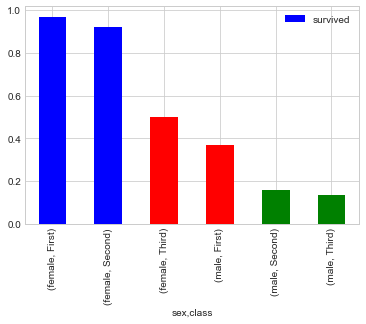

In [ ]:
titanic.groupby(['sex','class']).mean().plot(y='survived',kind='bar',color=['b','b','r','r','g','g'])

### 7. Is there a relationship between the town in which a passenger embarked onto the Titanic and the class in which he traveled? (★★★)

In [ ]:
third.groupby('embark_town').count()['class']

embark_town
Cherbourg       66
Queenstown      72
Southampton    353
Name: class, dtype: int64

In [ ]:
second.groupby('embark_town').count()['class']

embark_town
Cherbourg       17
Queenstown       3
Southampton    164
Name: class, dtype: int64

In [ ]:
first.groupby('embark_town').count()['class']

embark_town
Cherbourg       85
Queenstown       2
Southampton    127
Name: class, dtype: int64